In [1]:
import numpy as np
import pandas as pd
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from PIL import Image
import csv
import string

In [2]:
train_df = pd.read_csv('train.csv', header=None)
test_df = pd.read_csv('test.csv', header=None)
train_y = np.array(train_df.iloc[:, 0])
train_x = np.array(train_df.iloc[:, 1:])
test_y = np.array(test_df.iloc[:, 0])
test_x = np.array(test_df.iloc[:, 1:])

In [3]:
SIZE = 28
N_CLASSES = 62

In [4]:
train_x = train_x.reshape(train_x.shape[0],SIZE, SIZE)
test_x = test_x.reshape(test_x.shape[0],SIZE, SIZE)

In [5]:
# train_x = tf.keras.utils.normalize(train_x, axis=1)
# test_x = tf.keras.utils.normalize(test_x, axis=1)
train_x = train_x / 255
test_x = test_x / 255

In [126]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(62, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=10)
val_loss, val_acc = model.evaluate(test_x, test_y)
print(val_loss)
print(val_acc)

Epoch 1/10
186/186 [==============================] - 0s 2ms/step - loss: 2.6454 - accuracy: 0.3992
Epoch 2/10
186/186 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.8651
Epoch 3/10
186/186 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.9523
Epoch 4/10
186/186 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9755
Epoch 5/10
186/186 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9812
Epoch 6/10
186/186 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9840
Epoch 7/10
186/186 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 0.9862: 0s - loss: 0.0408 - accu
Epoch 8/10
186/186 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9879
Epoch 9/10
186/186 [==============================] - 0s 2ms/step - loss: 0.0325 - accuracy: 0.9892
Epoch 10/10
31/31 [==============================] - 0s 1ms/step - loss: 0

In [127]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [6]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [7]:
predictions = new_model.predict(test_x)
string_list = string.ascii_letters + string.digits

In [8]:
print(predictions)

[[3.2434062e-12 2.7601474e-05 5.0235059e-08 ... 6.5835543e-08
  2.8728061e-06 2.4427977e-09]
 [4.0259801e-19 3.3986973e-11 9.5753718e-16 ... 1.8655695e-09
  1.9180543e-08 2.1394420e-08]
 [3.9855711e-16 9.5293180e-05 1.1759933e-08 ... 7.8730966e-16
  3.5550551e-10 1.5597730e-15]
 ...
 [1.1321933e-09 9.6002594e-05 2.2180782e-07 ... 2.1410679e-07
  6.8095840e-05 4.5399152e-06]
 [1.7938377e-14 2.1580623e-05 1.3781719e-14 ... 1.2958996e-08
  4.7197705e-03 4.5041836e-04]
 [4.6526095e-12 7.6938215e-07 3.3435652e-15 ... 1.5608586e-09
  2.9376783e-05 1.1297446e-06]]


Letter: L


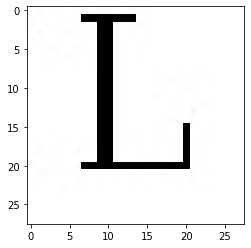

In [10]:
ps = 750
print("Letter: " + string_list[np.argmax(predictions[ps])])
plt.imshow(test_x[ps],cmap=plt.cm.binary)